## Machine Learning
***
#### Problem Set 1
#### Varvara Ilyina
#### 2024-02-28

The following exercises have been solved with the help of the lecture slides, as well as Chapters 1, 4 and 5 in _Probabilistic Machine Learning: An Introduction_ by Kevin Murphy. Additionally, various internet resources, friends and ChatGPT were used to aid me in generating the correct commands for my Python code (especially for questions 5, 7 and 8).

***
***

#### 1. The particular task we will be considering is predicting `vote` based on five features: `TVnews`, `PID`, `age`, `educ`, and `popul`. Calculate summary statistics for the label and five features described above. Pay attention to the meaning of each variable and present a summary of it that makes sense given how it is coded.

In [151]:
# load packages
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

In [165]:
# load dataset
data = sm.datasets.anes96.load_pandas().data

# extract necessary columns
features = ['TVnews', 'PID', 'age', 'educ', 'popul']
label = 'vote'
df = data[features + [label]]

# replace missings with NaN
df = df.replace('?', np.nan)

# drop missing values
df = df.dropna(axis = 1)

print(df.shape)
df.head()

(944, 6)


,TVnews,PID,age,educ,popul,vote
0,7.0,6.0,36.0,3.0,0.0,1.0
1,1.0,1.0,20.0,4.0,190.0,0.0
2,7.0,1.0,24.0,6.0,31.0,0.0
3,4.0,1.0,28.0,6.0,83.0,0.0
4,7.0,0.0,68.0,6.0,640.0,0.0


In [30]:
# print summary statistics
summary = df.describe()
print(summary)

           TVnews         PID         age        educ        popul        vote
count  944.000000  944.000000  944.000000  944.000000   944.000000  944.000000
mean     3.727754    2.842161   47.043432    4.565678   306.381356    0.416314
std      2.677235    2.273337   16.423130    1.599287  1082.606745    0.493208
min      0.000000    0.000000   19.000000    1.000000     0.000000    0.000000
25%      1.000000    1.000000   34.000000    3.000000     1.000000    0.000000
50%      3.000000    2.000000   44.000000    4.000000    22.000000    0.000000
75%      7.000000    5.000000   58.000000    6.000000   110.000000    1.000000
max      7.000000    6.000000   91.000000    7.000000  7300.000000    1.000000


In [105]:
# index df using `iloc`
X_no_intercept = df.iloc[:, 0:5].values  # data from first 5 columns
y = df.iloc[:, 5].values  # extract attribute/feature to be predicted from 6th column of df

# use seed to get a randomized sample with a 70%/30% split
seed = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

# standardize testing data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_no_intercept)
print(X_train)

[[ 1.22289631  1.38981276 -0.67278806 -0.97950413 -0.28315338]
 [-1.01941016 -0.81076296 -1.64754019 -0.35389391 -0.10755803]
 [ 1.22289631 -0.81076296 -1.40385216  0.89732651 -0.25450362]
 ...
 [-0.27197467  0.94969762 -0.24633401  0.89732651 -0.28315338]
 [ 0.84917856  1.38981276 -0.06356798  1.52293673 -0.28315338]
 [ 1.22289631  0.06946733  0.85026213  1.52293673 -0.26651803]]


In [110]:
# add intercept
X_train_intercept = sm.add_constant(X_train)

# create dataframe
X_train_intercept = pd.DataFrame(X_train_intercept, columns = ['intercept', 'TVnews', 'PID', 'age', 'educ', 'popul'])
print("X features:\n", X_train_intercept)

y_train = df.iloc[:, 5]
print("Y label:\n", y_train)

X features:
      intercept    TVnews       PID       age      educ     popul
0          1.0  1.222896  1.389813 -0.672788 -0.979504 -0.283153
1          1.0 -1.019410 -0.810763 -1.647540 -0.353894 -0.107558
2          1.0  1.222896 -0.810763 -1.403852  0.897327 -0.254504
3          1.0  0.101743 -0.810763 -1.160164  0.897327 -0.206446
4          1.0  1.222896 -1.250878  1.276716  0.897327  0.308326
..         ...       ...       ...       ...       ...       ...
939        1.0  1.222896  0.509582  1.581326  0.897327 -0.283153
940        1.0  1.222896  1.389813  0.180120  0.897327 -0.283153
941        1.0 -0.271975  0.949698 -0.246334  0.897327 -0.283153
942        1.0  0.849179  1.389813 -0.063568  1.522937 -0.283153
943        1.0  1.222896  0.069467  0.850262  1.522937 -0.266518

[944 rows x 6 columns]
Y label:
 0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
939    1.0
940    1.0
941    1.0
942    1.0
943    1.0
Name: vote, Length: 944, dtype: float64


#### 2. What is the formula for the closed form estimate of the coefficient vector in ordinary least squares regression? Estimate the coefficients using `numpy` in Python by performing the matrix operations from the closed form solution we worked out in class.

__Solution__: The closed form solution is $\hat{\beta} = (X^TX)^{-1}X^Ty$. This formula is used to estimate the coefficients in OLS regression below.

In [111]:
# estimate coefficients using the closed-form solution
beta = np.linalg.inv(X_train_intercept.T @ X_train_intercept) @ X_train_intercept.T @ y_train

print("Estimated coefficients (closed form solution):\n", beta)

Estimated coefficients (closed form solution):
 0    0.416314
1    0.004639
2    0.392557
3    0.022259
4    0.005333
5    0.000051
dtype: float64


#### 3. Estimate the coefficients using the `statsmodels` package. Compare them.

__Solution__: Both estimations, whether with an ordinary least squares regression or the `statsmodel` package, result in the same coefficients. The work to prove this is shown below.

In [112]:
# fit the model
model = sm.OLS(y_train, X_train_intercept).fit()

print("Estimated coefficients (statsmodel OLS):\n", model.summary())

Estimated coefficients (statsmodel OLS):
                             OLS Regression Results                            
Dep. Variable:                   vote   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     330.9
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          3.46e-204
Time:                        18:44:29   Log-Likelihood:                -191.93
No. Observations:                 944   AIC:                             395.9
Df Residuals:                     938   BIC:                             425.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept 

In [85]:
# compare coefficients
print("Coefficients from closed form solution:\n", beta)
print("Coefficients from statsmodels:\n", model.params)

Coefficients from closed form solution:
 0    0.416314
1    0.004639
2    0.392557
3    0.022259
4    0.005333
5    0.000051
dtype: float64
Coefficients from statsmodels:
 intercept    0.416314
TVnews       0.004639
PID          0.392557
age          0.022259
educ         0.005333
popul        0.000051
dtype: float64


#### 4. Now, think about the model you just estimated. In class, we talked about two assumptions we could use to motivate estimation of the variance of this coefficient vector. Which would you choose and why?

__Solution__: In the plot below, two parallel lines are seen. Since the results are not binary, they are difficult to interpret. With the help of ChatGPT, I was able to determine that the variance $\sigma^{2}$ varies between units, thus indicating _heteroskedasticity_. This violates the basic assumption of linear regression models and can lead to biased estimates of the regression coefficients.

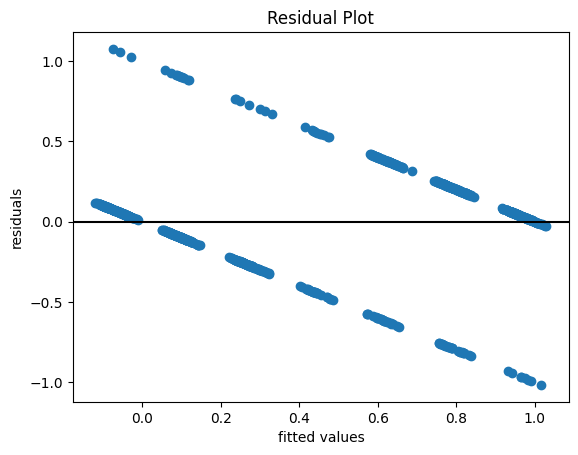

In [92]:
residuals = sm_results.resid

plt.scatter(sm_results.fittedvalues, residuals)
plt.title("Residual Plot")
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.show()

#### 5. Estimate the variance of these coefficients using the matrix formula.

__Solution__: To estimate the variance of the coefficients, I apply the concept of the "sandwich" estimator using the matrix formula $\text{Var}(\hat{\beta}) = (X^T X)^{-1} X^T \text{diag}(\hat{e}^2) X (X^T X)^{-1}$. This formula is used to correct any bias resulting from the heteroskedasticity found above. $\hat{e}^2 = (y - \hat{y})^2$ is used to calculate the squared residuals, where $\hat{e}^2$ are the squared differences between the observed values ($y$) and the predicted values ($\hat{y}$) obtained from the regression model.

In [144]:
# calculate needed values
X = X_train_intercept
y = y_train

# generate diagonal matrix of residuals
resid_diag_matrix = np.diag(residuals ** 2)

# calculate "sandwich" values
bread_1 = np.linalg.inv(X.T @ X) @ X.T
meat = resid_diag_matrix
bread_2 = X @ np.linalg.inv(X.T @ X)

# check matrix dimensions
print(bread_1.shape)
print(meat.shape)
print(bread_2.shape)

# plug into "sandwich" formula
variance_coeff = bread_1 @ meat @ bread_2
print("Estimated variance of coefficients:\n", variance_coeff)

(6, 944)
(944, 944)
(944, 6)
Estimated variance of coefficients:
           0             1         2         3             4         5
0  0.000093  3.645171e-06  0.000028  0.000002 -2.560040e-06  0.000012
1  0.000004  1.151078e-04  0.000013 -0.000042  8.624614e-08  0.000013
2  0.000028  1.318217e-05  0.000066 -0.000009 -1.625723e-05  0.000008
3  0.000002 -4.166116e-05 -0.000009  0.000107  2.010585e-05 -0.000001
4 -0.000003  8.624614e-08 -0.000016  0.000020  9.479563e-05  0.000015
5  0.000012  1.255711e-05  0.000008 -0.000001  1.529698e-05  0.000155


#### 6. Create a table showing, for each feature, _j_, the estimate ($\hat{β}_{j}$), the standard error $\sqrt{\hat{Var}(\hat{β})}_{jj}$, and the upper and lower bounds of the 95% confidence interval ($\hat{β}_{j}±z_{\alpha}\sqrt{\hat{Var}(\hat{β})}_{jj}$). Compare the variance to what you got from statsmodels. What assumption are they using on the variance?

In [173]:
# specify features
features_int = ['Intercept'] + features

# calculate standard error
std_err = np.sqrt(np.diag(variance_coeff))

# calculate upper / lower bounds of 95% confidence interval
z_alpha = norm.ppf(0.975)

lower_bound = beta - z_alpha * std_err
upper_bound = beta + z_alpha * std_err

# generate table
table_6 = pd.DataFrame({'Feature': features_int,
                        'Coefficient': beta,
                        'Std. Error': std_err,
                        'Lower Bound (95% CI)': lower_bound,
                        'Upper Bound (95% CI)': upper_bound})

print(table_6)

     Feature  Coefficient  Std. Error  Lower Bound (95% CI)  \
0  Intercept     0.416314    0.009651              0.397398   
1     TVnews     0.004639    0.010729             -0.016389   
2        PID     0.392557    0.008107              0.376667   
3        age     0.022259    0.010340              0.001993   
4       educ     0.005333    0.009736             -0.013749   
5      popul     0.000051    0.012445             -0.024342   

   Upper Bound (95% CI)  
0              0.435229  
1              0.025667  
2              0.408447  
3              0.042525  
4              0.024416  
5              0.024443  


#### 7. Write a function with three arguments:
* `beta`: A 1D numpy array representing a particular value of your coefficients, $β$.
* `label`: A 1D numpy array of the labels in your dataset.
* `features`: A 2D numpy array representing the features in your dataset.
##### This function should output a single number, the negative log-likelihood evaluated at the chosen value of $β$.

I had help from ChatGPT for this exercise, as I am still new to writing Python code.

Input into my `nll` function are three arguments, namely the `beta` coefficient, the `label` with `vote` and then the five `features` . Within the function, I first create `features_coeff` for the scores for each observations, which represent the strength of the association between the feature and the outcome. Next, I apply the sigmoid function to transform these into interpretable probabilities ($\hat{p}$). The negative log likelihood is a quantitative measure of how well the model was able to predict the data, i.e., whether the predicted probabilities align with the actual observed data.

In [176]:
# define function
def nll(beta, label, features):
    features_coeff = np.dot(features, beta)
    p_hat = 1 / (1 + np.exp(-features_coeff))
    nll_value = -np.sum(label * np.log(p_hat) + (1 - label) * np.log(1 - p_hat))
    return nll_value

#### 8. Using the `SciPy` library, minimize the objective function we discussed in class for logistic regression.

The `nll` function is adjusted to restrict the outputted values

In [ ]:
# me




opt_result = scipy.optimize.minimize(
nll, args = (X, y), x0 = [0] * 6, method = 'BFGS'
)
beta_logistic = opt_result.x

In [ ]:
# armande

from scipy.optimize import minimize

def negative_log_likelihood(beta, X, y):
    features_coeff = np.dot(X, beta)
    p_hat = 1 / (1 + np.exp(-features_coeff))
    eps = np.finfo(float).eps #use of the command to know the smallest floating point number
    p_hat_clipped = np.clip(p_hat, eps, 1 - eps)  # Clip probabilities to avoid zeros and ones
    nll = -np.sum(y * np.log(p_hat_clipped) + (1 - y) * np.log(1 - p_hat_clipped))
    return nll

initial_beta = np.zeros(X.shape[1])

# Minimize the negative log-likelihood function
opt_result = minimize(negative_log_likelihood, initial_beta, args=(X, y), method='BFGS')

# Extract the optimal coefficients
beta_logistic = opt_result.x

print("Optimal coefficients:", beta_logistic)

In [ ]:
# giulia

def nll_function(beta, features, label):  # same function as above but we are clipping, or bounding, values within  specified range 
    # we need the features coefficients to reproduce scores for each observation
    # the scores represent the strenght of association between the feature and the outcome 
    features_coeff = np.dot(features, beta) 
    # to trasform the raw scores into interpretable probabilities of class membership (Dole or Clinton), we apply the sigmoid function 
    p_hat = 1 / (1 + np.exp(-features_coeff))

    eps = np.finfo(float).eps # a very small number close to zero
    # np.clip() function is used to ensure that the predicted probabilities (p_hat) are bounded between eps and 1 - eps
    # its basically to avoid 0 but still getting extremely close to it 
    p_hat_clipped = np.clip(p_hat, eps, 1 - eps) # p_hat variable used here is the clipped version
    # This ensures that the predicted probabilities passed to the negative log-likelihood calculation are within a valid range 
    
    # next step quantifies how well the model's predicted probabilities align with the actual labels observed in the dataset.
    nll = -np.sum(label * np.log(p_hat_clipped) + (1 - label) * np.log(1 - p_hat_clipped))
    return nll # discrepancy between the observed data and the predictions made by the model

initial_beta = np.zeros(X.shape[1])  # ChatGPT suggested this and taught me its scope in this function 
# By setting the initial coefficients to zero, the optimization algorithm starts from a neutral point 
# The algorithm iteratively adjusts the coefficients to minimize the negative log-likelihood function

# Minimize the negative log-likelihood function
opt_result = minimize(nll_function, initial_beta, args=(X, y), method='BFGS')

beta_logistic = opt_result.x# these are the optimal coefficients 

print("Optimal coefficients:", beta_logistic)

# These coefficients are optimal because they do a better job at minimizing the difference the observed data and the predictions made by the model.

#### 9. Now you can construct your predictions by taking the dot-product between beta logistic and your feature matrix and then passing that dot-product through the sigmoid function. This provides an estimate of the probability of class membership. Also calculate the most likely class for each unit by predicting a 1 when $p(y$<sub>i</sub>$|x$<sub>i</sub>$; β) > 0.5$ (i.e. the Heaviside function).

#### 10. Construct class estimates for your OLS predictions as well by calculating $1(Xβ_{ols} > 0.5)$ (i.e. output a $1$ if the OLS predicted value is greater than $0.5$).

#### 11. Calculate the full confusion matrix for the logistic regression and the OLS model.

#### 12. Plot the relationship between the predictions from the linear regression in Question 1 (on the x-axis) and the predictions from the logistic regression (on the y-axis). What do you see?

#### 13. Separating users into communities based on the kind of stories they engage with and other users they interact with.

#### 14. Predicting whether users will click on a story or not based on their past behavior.

#### 15. Choosing which story to show a user in order to keep them active on the platform for longer.